<a href="https://colab.research.google.com/github/leonnmarcoo/CCADMACL_COM232_PROJECT/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**

## **Import**

In [1]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## **Load the dataset**

In [2]:
df = pd.read_csv("movie_dataset.csv")

## **Understanding the Data**

In [3]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [5]:
df.nunique()

index                   4803
budget                   436
genres                  1168
homepage                1691
id                      4803
keywords                4219
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
cast                    4741
crew                    4776
director                2349
dtype: int64

In [6]:
df['status'].value_counts()

status
Released           4795
Rumored               5
Post Production       3
Name: count, dtype: int64

In [7]:
columns_to_drop = ['index', 'id', 'keywords', 'original_title', 'overview', 'spoken_languages', 'status', 'tagline', 'title', 'crew']
df.drop(columns=columns_to_drop, inplace=True)

In [8]:
df.isnull().sum()

budget                     0
genres                    28
homepage                3091
original_language          0
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
vote_average               0
vote_count                 0
cast                      43
director                  30
dtype: int64

## **Data Cleaning**

In [9]:
df['homepage'] = df['homepage'].notna().astype(int)
df['genres'] = df['genres'].str.split(' ')
df['production_companies'] = df['production_companies'].apply(
    lambda x: ', '.join([d['name'] for d in ast.literal_eval(x)])
)
df['production_countries'] = df['production_countries'].apply(
        lambda x: ', '.join([d['name'] for d in ast.literal_eval(x)])
)
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

def combine_first_last_names(name_string):
    if pd.isna(name_string) or not isinstance(name_string, str):
        return []
    words = name_string.split(' ')
    full_names = []
    i = 0
    while i < len(words):
        # Try to combine two words for a name
        if i + 1 < len(words):
            full_names.append(f"{words[i]} {words[i+1]}")
            i += 2
        else:
            # If only one word remains, treat it as a single-word name
            full_names.append(words[i])
            i += 1
    return full_names

df['cast'] = df['cast'].apply(combine_first_last_names)
df['director'] = df['director'].apply(combine_first_last_names)

In [10]:
df.head()

,budget,genres,homepage,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast,director
0,237000000,"[Action, Adventure, Fantasy, Science, Fiction]",1,en,150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009.0,2787965087,162.0,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,300000000,"[Adventure, Fantasy, Action]",1,en,139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007.0,961000000,169.0,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,245000000,"[Action, Adventure, Crime]",1,en,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015.0,880674609,148.0,6.3,4466,"[Daniel Craig, Christoph Waltz, L\u00e9a Seydo...",[Sam Mendes]
3,250000000,"[Action, Crime, Drama, Thriller]",1,en,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012.0,1084939099,165.0,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,260000000,"[Action, Adventure, Science, Fiction]",1,en,43.926995,Walt Disney Pictures,United States of America,2012.0,284139100,132.0,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


### **Number of Genres**

In [11]:
unique_count = df['genres'].explode().nunique()
print("Number of unique genres:", unique_count)

Number of unique genres: 22


In [12]:
unique_genres = df['genres'].explode().unique()
print(unique_genres)

['Action' 'Adventure' 'Fantasy' 'Science' 'Fiction' 'Crime' 'Drama'
 'Thriller' 'Animation' 'Family' 'Western' 'Comedy' 'Romance' 'Horror'
 'Mystery' 'History' 'War' 'Music' 'Documentary' 'Foreign' 'TV' 'Movie'
 nan]


In [13]:
genre_counts = df['genres'].explode().value_counts()
print(genre_counts)

genres
Drama          2297
Comedy         1722
Thriller       1259
Action         1153
Romance         890
Adventure       790
Crime           696
Fiction         530
Science         530
Horror          519
Family          510
Fantasy         418
Mystery         347
Animation       234
History         197
Music           183
War             142
Documentary     110
Western          80
Foreign          34
TV                8
Movie             8
Name: count, dtype: int64


In [14]:
low_count_genres = genre_counts[genre_counts < 100].index.tolist()

df['genres'] = df['genres'].apply(
    lambda x: [genre for genre in x if genre not in low_count_genres] if isinstance(x, list) else []
)

print(f"Genres with counts less than 100 removed from 'genres' column: {low_count_genres}")

Genres with counts less than 100 removed from 'genres' column: ['Western', 'Foreign', 'TV', 'Movie']


In [15]:
df['genres'] = df['genres'].apply(lambda x: [g.strip() for g in x] if isinstance(x, list) else [])

genres_dummies = pd.get_dummies(df['genres'].explode(), prefix='genres').groupby(level=0).max().astype(int)

df = df.join(genres_dummies)

df = df.drop(columns=['genres'])

In [16]:
df.head()

,budget,homepage,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,...,genres_Fantasy,genres_Fiction,genres_History,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science,genres_Thriller,genres_War
0,237000000,1,en,150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009.0,2787965087,162.0,7.2,...,1,1,0,0,0,0,0,1,0,0
1,300000000,1,en,139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007.0,961000000,169.0,6.9,...,1,0,0,0,0,0,0,0,0,0
2,245000000,1,en,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015.0,880674609,148.0,6.3,...,0,0,0,0,0,0,0,0,0,0
3,250000000,1,en,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012.0,1084939099,165.0,7.6,...,0,0,0,0,0,0,0,0,1,0
4,260000000,1,en,43.926995,Walt Disney Pictures,United States of America,2012.0,284139100,132.0,6.1,...,0,1,0,0,0,0,0,1,0,0


/var/folders/rw/nyg126716tq0wlsfjr46grsh0000gn/T/ipykernel_8160/3972253365.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_genres.index, y=all_genres.values, palette='viridis')


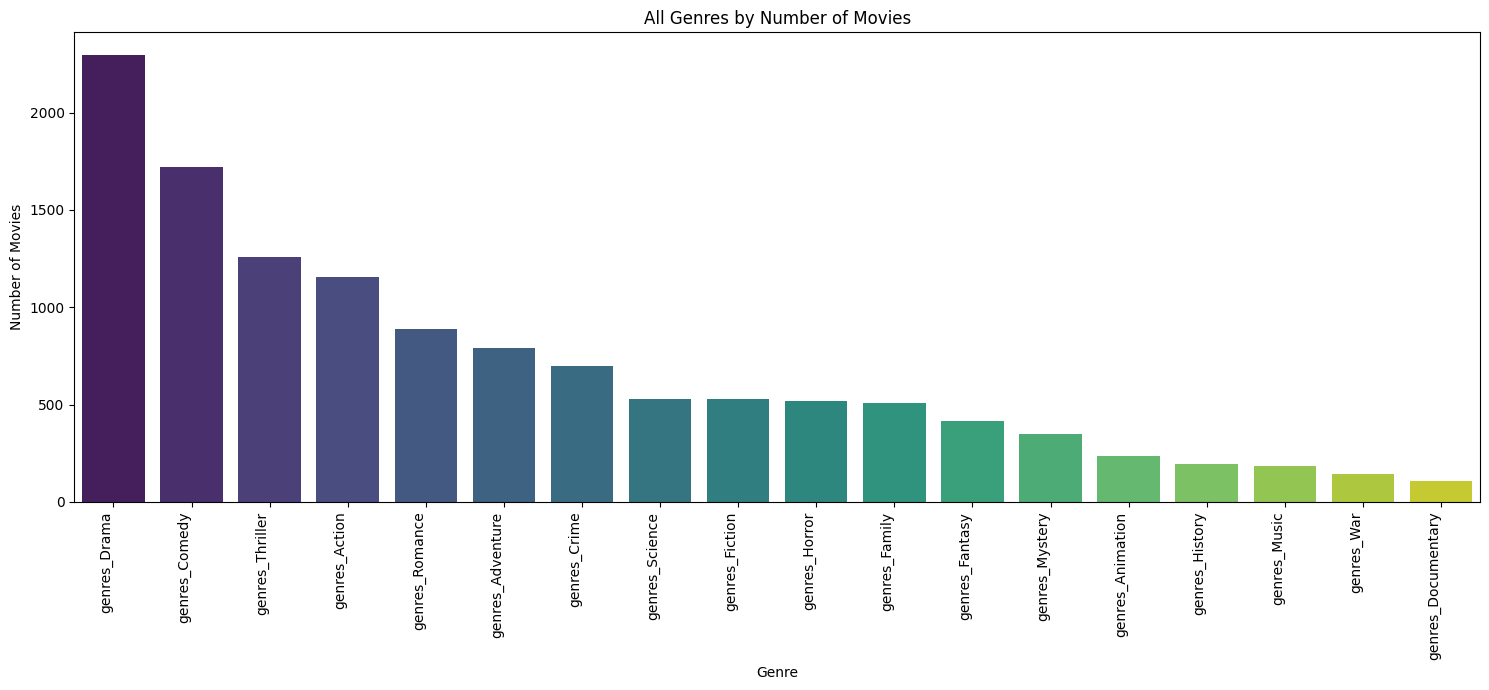

In [17]:
genre_columns = [col for col in df.columns if col.startswith('genres_')]

genre_columns = [col for col in genre_columns if col != 'genres__']

if not genre_columns:
    print("No columns starting with 'genres_' found.")
else:
    genres_counts = df[genre_columns].sum().sort_values(ascending=False)

    all_genres = genres_counts

    plt.figure(figsize=(15, 7))
    sns.barplot(x=all_genres.index, y=all_genres.values, palette='viridis')
    plt.title('All Genres by Number of Movies')
    plt.xlabel('Genre')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

### **Number of Language**

In [18]:
unique_count = df['original_language'].nunique()
print("Number of unique language:", unique_count)

Number of unique language: 37


In [19]:
unique_values = df['original_language'].unique()
print(unique_values)


['en' 'ja' 'fr' 'zh' 'es' 'de' 'hi' 'ru' 'ko' 'te' 'cn' 'it' 'nl' 'ta'
 'sv' 'th' 'da' 'xx' 'hu' 'cs' 'pt' 'is' 'tr' 'nb' 'af' 'pl' 'he' 'ar'
 'vi' 'ky' 'id' 'ro' 'fa' 'no' 'sl' 'ps' 'el']


In [20]:
value_counts = df['original_language'].value_counts()
print(value_counts)

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64


In [21]:
lang_counts = df['original_language'].value_counts()

low_count_langs = lang_counts[lang_counts < 20].index.tolist()

df['original_language'] = df['original_language'].apply(
    lambda x: x if x not in low_count_langs else None
)

print(f"Languages with counts less than 20 removed from 'original_language' column: {low_count_langs}")

Languages with counts less than 20 removed from 'original_language' column: ['hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt', 'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi', 'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te', 'el']


In [22]:
df = pd.get_dummies(df, columns=['original_language'], prefix='lang', dtype=int)

In [23]:
df.head()

,budget,homepage,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,...,genres_Mystery,genres_Romance,genres_Science,genres_Thriller,genres_War,lang_de,lang_en,lang_es,lang_fr,lang_zh
0,237000000,1,150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009.0,2787965087,162.0,7.2,11800,...,0,0,1,0,0,0,1,0,0,0
1,300000000,1,139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007.0,961000000,169.0,6.9,4500,...,0,0,0,0,0,0,1,0,0,0
2,245000000,1,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015.0,880674609,148.0,6.3,4466,...,0,0,0,0,0,0,1,0,0,0
3,250000000,1,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012.0,1084939099,165.0,7.6,9106,...,0,0,0,1,0,0,1,0,0,0
4,260000000,1,43.926995,Walt Disney Pictures,United States of America,2012.0,284139100,132.0,6.1,2124,...,0,0,1,0,0,0,1,0,0,0


/var/folders/rw/nyg126716tq0wlsfjr46grsh0000gn/T/ipykernel_8160/1551459671.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_languages.index, y=all_languages.values, palette='viridis')


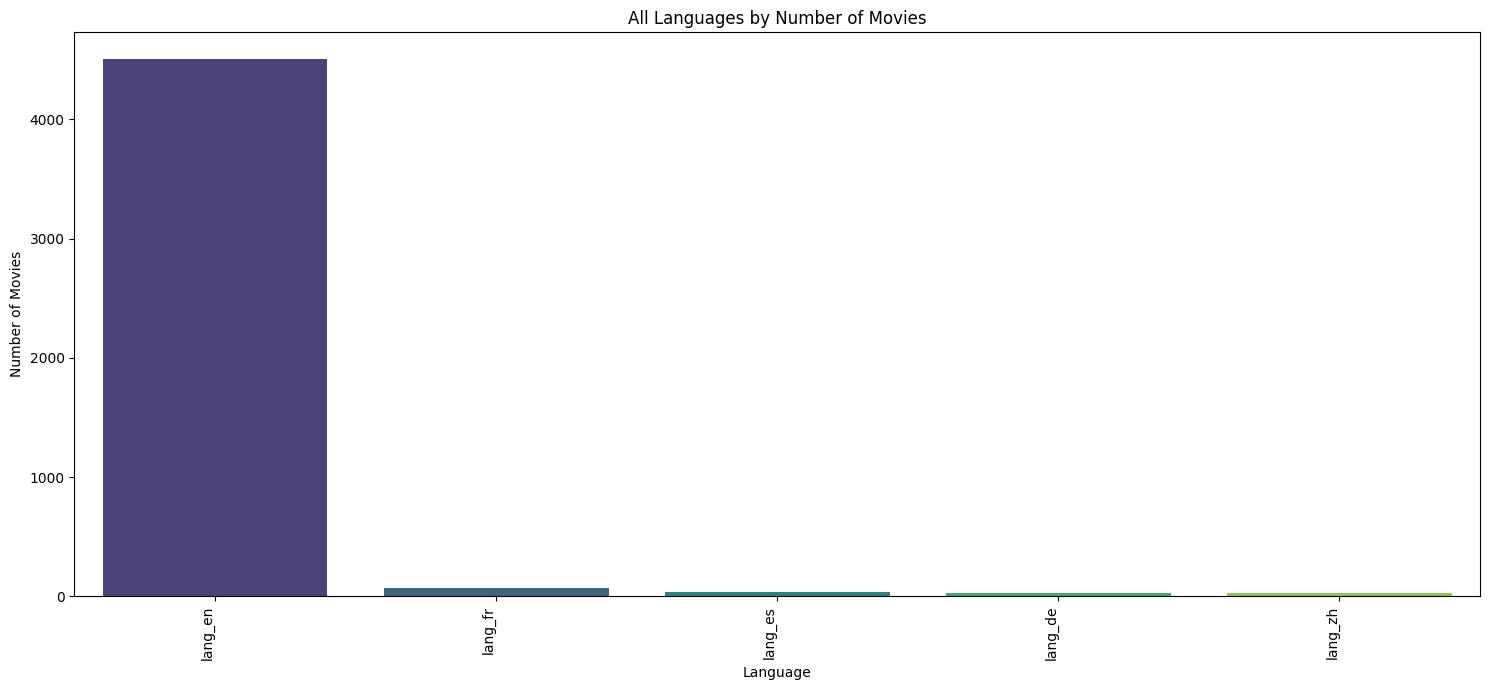

In [24]:
lang_columns = [col for col in df.columns if col.startswith('lang_')]

lang_columns = [col for col in lang_columns if col != 'lang__']

if not lang_columns:
    print("No columns starting with 'lang_' found.")
else:
    lang_counts = df[lang_columns].sum().sort_values(ascending=False)

    all_languages = lang_counts

    plt.figure(figsize=(15, 7))
    sns.barplot(x=all_languages.index, y=all_languages.values, palette='viridis')
    plt.title('All Languages by Number of Movies')
    plt.xlabel('Language')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

### **Number of Production Company**

In [25]:
unique_count = df['production_companies'].str.split(', ').explode().nunique()
print("Number of unique company:", unique_count)

Number of unique company: 5026


In [26]:
unique_values = df['production_companies'].str.split(', ').explode().unique()
print(unique_values)

['Ingenious Film Partners' 'Twentieth Century Fox Film Corporation'
 'Dune Entertainment' ... 'Front Street Pictures'
 'rusty bear entertainment' 'lucky crow films']


In [27]:
value_counts = df['production_companies'].str.split(', ').explode().value_counts()
print(value_counts)

production_companies
                                          351
Warner Bros.                              319
Universal Pictures                        311
Paramount Pictures                        285
Twentieth Century Fox Film Corporation    222
                                         ... 
Rocklin / Faust                             1
First Look Media                            1
Greenlit Rights                             1
Q Productions                               1
lucky crow films                            1
Name: count, Length: 5026, dtype: int64


In [28]:
company_counts = df['production_companies'].str.split(', ').explode().value_counts()

low_count_companies = company_counts[company_counts < 50].index.tolist()

df['production_companies'] = df['production_companies'].apply(
    lambda x: ', '.join([company for company in x.split(', ') if company not in low_count_companies])
    if isinstance(x, str) else ''
)

print(f"Production companies with counts less than 50 removed from 'production_companies' column: {low_count_companies}")

Production companies with counts less than 50 removed from 'production_companies' column: ['Amblin Entertainment', 'The Weinstein Company', 'StudioCanal', 'Screen Gems', 'Castle Rock Entertainment', 'New Regency Pictures', 'BBC Films', 'Spyglass Entertainment', 'Scott Rudin Productions', 'Focus Features', 'Imagine Entertainment', 'UK Film Council', 'Film4', 'Lions Gate Films', 'Lakeshore Entertainment', 'Revolution Studios', 'Legendary Pictures', 'Davis Entertainment', 'Silver Pictures', 'Epsilon Motion Pictures', 'Happy Madison Productions', 'DreamWorks Animation', 'Original Film', 'Hollywood Pictures', 'Ingenious Film Partners', 'Millennium Films', 'Scott Free Productions', 'TSG Entertainment', 'Studio Babelsberg', 'Dune Entertainment III', 'NPV Entertainment', 'Participant Media', 'EuropaCorp', 'Morgan Creek Productions', 'MTV Films', 'Nickelodeon Movies', 'Blumhouse Productions', 'Intermedia Films', 'Alcon Entertainment', 'Eon Productions', 'Jerry Bruckheimer Films', 'France 2 Ciné

In [29]:
df['production_companies'] = df['production_companies'].apply(lambda x: [company.strip() for company in x.split(', ')] if isinstance(x, str) else [])

df = df.join(
    pd.get_dummies(df['production_companies']
    .explode(), prefix='company')
    .groupby(level=0)
    .max()
    .astype(int)
)

df = df.drop(columns=['production_companies'])

In [30]:
df.head()

,budget,homepage,popularity,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast,...,company_The,company_Touchstone Pictures,company_TriStar Pictures,company_Twentieth Century Fox Film Corporation,company_United Artists,company_Universal Pictures,company_Village Roadshow Pictures,company_Walt Disney Pictures,company_Warner Bros.,company_Working Title Films
0,237000000,1,150.437577,"United States of America, United Kingdom",2009.0,2787965087,162.0,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",...,0,0,0,1,0,0,0,0,0,0
1,300000000,1,139.082615,United States of America,2007.0,961000000,169.0,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",...,0,0,0,0,0,0,0,1,0,0
2,245000000,1,107.376788,"United Kingdom, United States of America",2015.0,880674609,148.0,6.3,4466,"[Daniel Craig, Christoph Waltz, L\u00e9a Seydo...",...,0,0,0,0,0,0,0,0,0,0
3,250000000,1,112.312950,United States of America,2012.0,1084939099,165.0,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...",...,0,0,0,0,0,0,0,0,1,0
4,260000000,1,43.926995,United States of America,2012.0,284139100,132.0,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",...,0,0,0,0,0,0,0,1,0,0


/var/folders/rw/nyg126716tq0wlsfjr46grsh0000gn/T/ipykernel_8160/3973372141.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_companies.index, y=all_companies.values, palette='viridis')


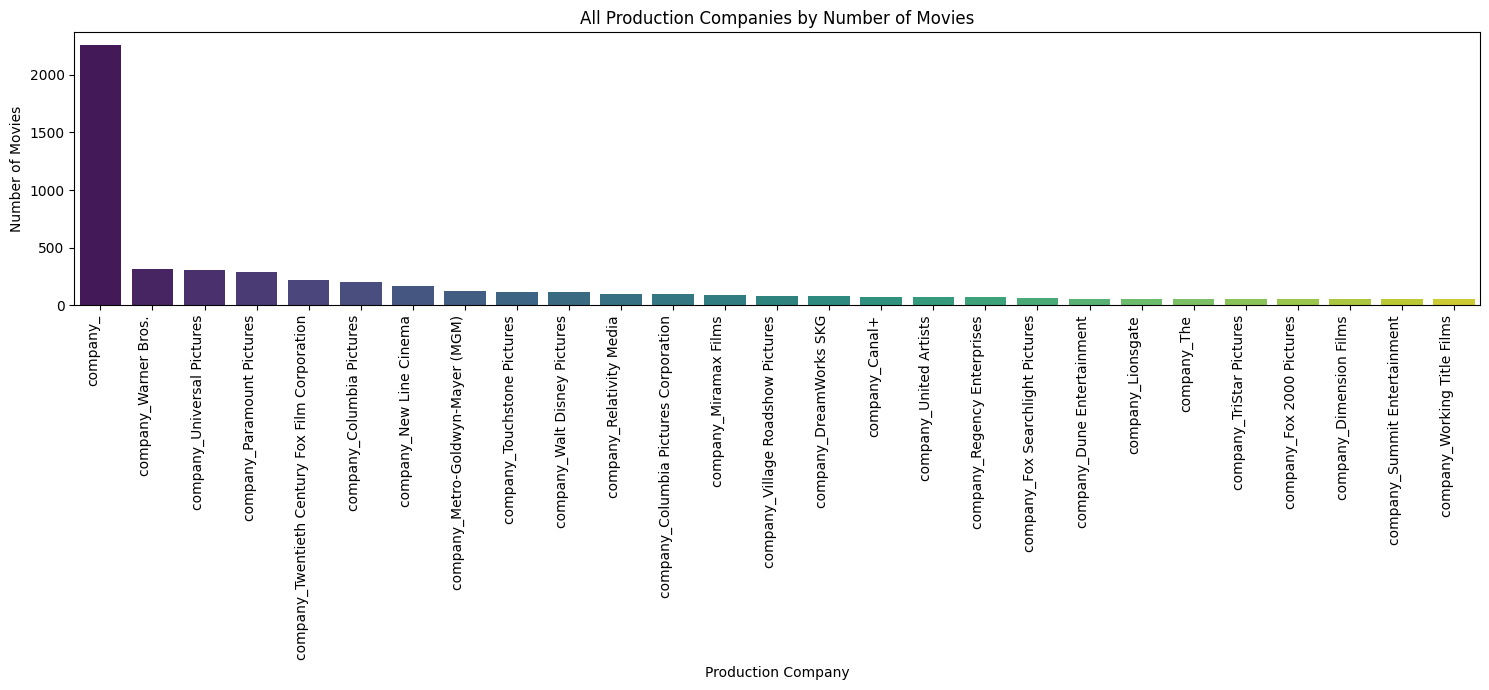

In [31]:
company_columns = [col for col in df.columns if col.startswith('company_')]

company_columns = [col for col in company_columns if col != 'company__']

if not company_columns:
    print("No columns starting with 'company_' found.")
else:
    company_counts = df[company_columns].sum().sort_values(ascending=False)

    all_companies = company_counts

    plt.figure(figsize=(15, 7))
    sns.barplot(x=all_companies.index, y=all_companies.values, palette='viridis')
    plt.title('All Production Companies by Number of Movies')
    plt.xlabel('Production Company')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

### **Number of Production Country**

In [32]:
unique_count = df['production_countries'].str.split(', ').explode().nunique()
print("Number of unique countries:", unique_count)

Number of unique countries: 89


In [33]:
unique_values = df['production_countries'].str.split(', ').explode().unique()
print(unique_values)

['United States of America' 'United Kingdom' 'Jamaica' 'Bahamas'
 'Dominica' 'Czech Republic' 'Poland' 'Slovenia' 'New Zealand' 'Germany'
 'China' 'Canada' 'Italy' 'Japan' 'Malta' 'Australia' 'France' 'Belgium'
 'India' 'Netherlands' 'Spain' 'United Arab Emirates' 'Hong Kong' 'Taiwan'
 'Ireland' 'Morocco' '' 'Hungary' 'Singapore' 'Norway' 'Sweden'
 'South Africa' 'Russia' 'Romania' 'Mexico' 'Monaco' 'Switzerland'
 'Pakistan' 'Malaysia' 'Finland' 'Iceland' 'Denmark' 'Tunisia'
 'Philippines' 'Bulgaria' 'South Korea' 'Brazil' 'Peru' 'Luxembourg'
 'Bosnia and Herzegovina' 'Kazakhstan' 'Portugal' 'Aruba'
 'Libyan Arab Jamahiriya' 'Serbia' 'Ukraine' 'Chile' 'Argentina' 'Panama'
 'Austria' 'Greece' 'Lithuania' 'Cambodia' 'Thailand' 'Slovakia' 'Israel'
 'Fiji' 'Serbia and Montenegro' 'Turkey' 'Nigeria' 'Cyprus' 'Jordan'
 'Bolivia' 'Ecuador' 'Colombia' 'Egypt' 'Bhutan' 'Lebanon'
 'Kyrgyz Republic' 'Algeria' 'Indonesia' 'Guyana' 'Iran' 'Guadaloupe'
 'Afghanistan' 'Angola' 'Dominican Republic' 'C

In [34]:
value_counts = df['production_countries'].str.split(', ').explode().value_counts()
print(value_counts)

production_countries
United States of America    3956
United Kingdom               636
Germany                      324
France                       306
Canada                       261
                            ... 
Panama                         1
Portugal                       1
Ukraine                        1
Serbia                         1
Kenya                          1
Name: count, Length: 89, dtype: int64


In [35]:
company_counts = df['production_countries'].str.split(', ').explode().value_counts()

low_count_countries = company_counts[company_counts < 100].index.tolist()

df['production_countries'] = df['production_countries'].apply(
    lambda x: ', '.join([company for company in x.split(', ') if company not in low_count_countries])
    if isinstance(x, str) else ''
)

print(f"Production countries with counts less than 100 removed from 'production_countries' column: {low_count_countries}")

Production countries with counts less than 100 removed from 'production_countries' column: ['Italy', 'Spain', 'China', 'Japan', 'India', 'Hong Kong', 'Ireland', 'Mexico', 'New Zealand', 'Belgium', 'Czech Republic', 'South Africa', 'Denmark', 'Russia', 'Switzerland', 'Sweden', 'South Korea', 'Netherlands', 'Norway', 'United Arab Emirates', 'Hungary', 'Brazil', 'Romania', 'Luxembourg', 'Argentina', 'Austria', 'Thailand', 'Israel', 'Poland', 'Iceland', 'Taiwan', 'Finland', 'Iran', 'Bulgaria', 'Bahamas', 'Morocco', 'Malta', 'Pakistan', 'Greece', 'Chile', 'Jamaica', 'Colombia', 'Slovakia', 'Slovenia', 'Malaysia', 'Kazakhstan', 'Peru', 'Singapore', 'Aruba', 'Indonesia', 'Monaco', 'Egypt', 'Bhutan', 'Lebanon', 'Kyrgyz Republic', 'Algeria', 'Guyana', 'Bolivia', 'Philippines', 'Guadaloupe', 'Afghanistan', 'Angola', 'Dominican Republic', 'Cameroon', 'Ecuador', 'Cyprus', 'Jordan', 'Libyan Arab Jamahiriya', 'Nigeria', 'Turkey', 'Serbia and Montenegro', 'Fiji', 'Tunisia', 'Dominica', 'Cambodia', 'L

In [36]:
df['production_countries'] = df['production_countries'].apply(lambda x: [country.strip() for country in x.split(', ')] if isinstance(x, str) else [])

df = df.join(
    pd.get_dummies(df['production_countries']
    .explode(), prefix='country_')
    .groupby(level=0)
    .max()
    .astype(int)
)

df = df.drop(columns=['production_countries'])

In [37]:
df.head()

,budget,homepage,popularity,release_date,revenue,runtime,vote_average,vote_count,cast,director,...,company_Walt Disney Pictures,company_Warner Bros.,company_Working Title Films,country__,country__Australia,country__Canada,country__France,country__Germany,country__United Kingdom,country__United States of America
0,237000000,1,150.437577,2009.0,2787965087,162.0,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],...,0,0,0,0,0,0,0,0,1,1
1,300000000,1,139.082615,2007.0,961000000,169.0,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],...,1,0,0,0,0,0,0,0,0,1
2,245000000,1,107.376788,2015.0,880674609,148.0,6.3,4466,"[Daniel Craig, Christoph Waltz, L\u00e9a Seydo...",[Sam Mendes],...,0,0,0,0,0,0,0,0,1,1
3,250000000,1,112.312950,2012.0,1084939099,165.0,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan],...,0,1,0,0,0,0,0,0,0,1
4,260000000,1,43.926995,2012.0,284139100,132.0,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton],...,1,0,0,0,0,0,0,0,0,1


/var/folders/rw/nyg126716tq0wlsfjr46grsh0000gn/T/ipykernel_8160/2035575603.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_countries.index, y=all_countries.values, palette='viridis')


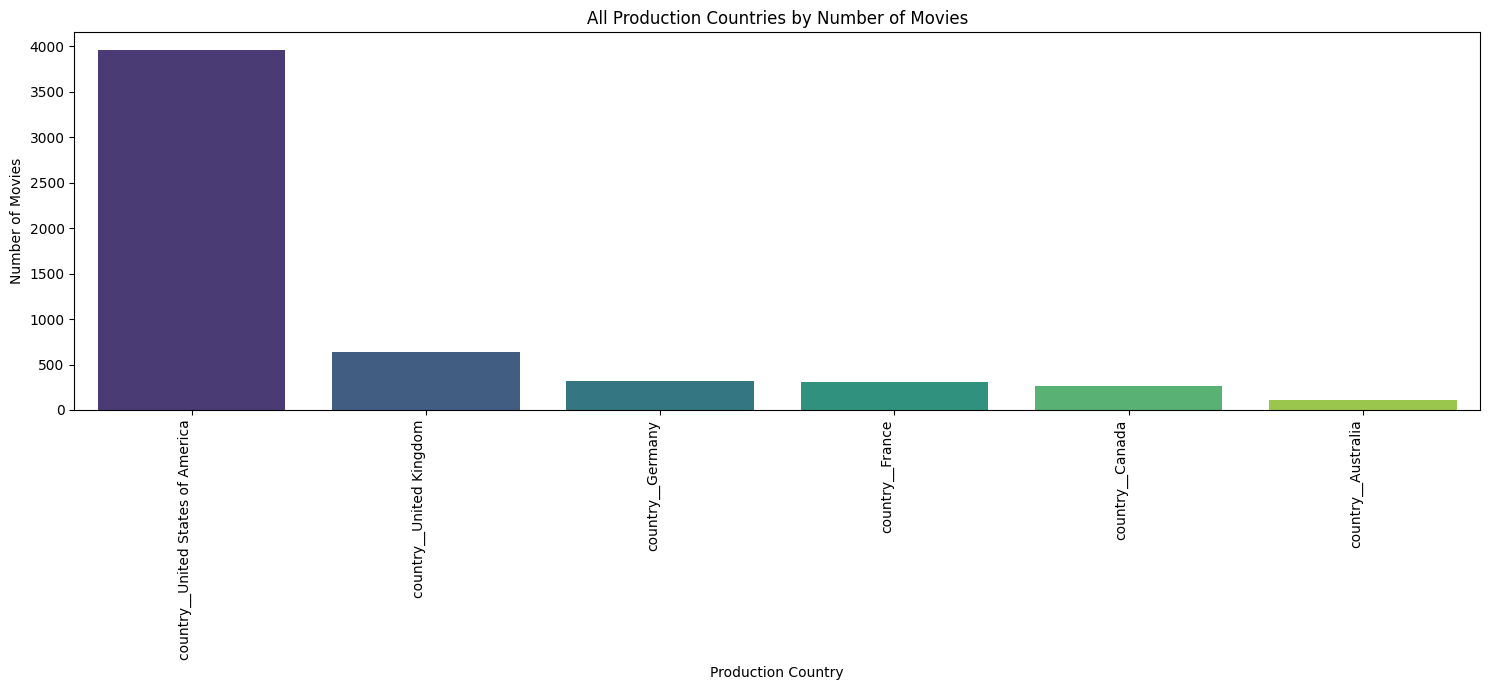

In [38]:
country_columns = [col for col in df.columns if col.startswith('country_')]

# Filter out the empty country column if it exists
country_columns = [col for col in country_columns if col != 'country__']

if not country_columns:
    print("No columns starting with 'country_' found.")
else:
    country_counts = df[country_columns].sum().sort_values(ascending=False)

    all_countries = country_counts

    plt.figure(figsize=(15, 7))
    sns.barplot(x=all_countries.index, y=all_countries.values, palette='viridis')
    plt.title('All Production Countries by Number of Movies')
    plt.xlabel('Production Country')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

### **Number of Cast**

In [39]:
unique_count = df['cast'].explode().nunique()
print("Number of unique cast:", unique_count)

Number of unique cast: 12221


In [40]:
unique_cast = df['cast'].explode().unique()
print(unique_cast)

['Sam Worthington' 'Zoe Saldana' 'Sigourney Weaver' ... 'Alan Ruck'
 'Zhu Shimao' 'Brian Herzlinger']


In [41]:
cast_counts = df['cast'].explode().value_counts()
print(cast_counts)

cast
Robert De           51
Samuel L.           41
Bruce Willis        38
Matt Damon          35
Morgan Freeman      34
                    ..
T.I. Evan            1
Ross Jackie          1
Long Lauren          1
London Albert        1
Brian Herzlinger     1
Name: count, Length: 12221, dtype: int64


In [42]:
low_count_cast = cast_counts[cast_counts < 10].index.tolist()

df['cast'] = df['cast'].apply(
    lambda x: [cast for cast in x if cast not in low_count_cast] if isinstance(x, list) else []
)

print(f"cast with counts less than 10 removed from 'cast' column: {low_count_cast}")

cast with counts less than 10 removed from 'cast' column: ['Parker Posey', 'Evan Rachel', 'Michael Madsen', 'Wesley Snipes', 'Cillian Murphy', 'Piper Perabo', 'John Krasinski', 'Mark Strong', 'Vanessa Hudgens', 'Randy Quaid', 'Michelle Rodriguez', 'Emma Thompson', 'Hope Davis', 'Robin Wright', 'Williams', 'Megan Fox', 'Claire Danes', 'Rachael Leigh', 'Rosamund Pike', 'David Arquette', 'Kenneth Branagh', 'Javier Bardem', 'Wes Bentley', 'Jason Sudeikis', 'Johnny Knoxville', 'Bruce Dern', 'Oscar Isaac', 'Miles Teller', 'Ryan Phillippe', 'Ellen Burstyn', 'Cedric the', 'Robert Englund', 'Idris Elba', 'Chlo\\u00eb Sevigny', 'Paula Patton', 'Chiwetel Ejiofor', 'Meagan Good', 'Dominic West', 'Sarah Michelle', 'J.K. Simmons', 'Vincent Cassel', 'David Cross', 'Andy Serkis', 'Maggie Smith', 'Eric Roberts', 'Stephen Dorff', 'Aidan Quinn', 'Cliff Curtis', 'Dakota Fanning', 'Michael Angarano', 'Brittany Murphy', 'Jones', 'Ian McShane', 'Richard Harris', 'Jonathan Rhys', 'Daniel Day-Lewis', 'Sharon S

In [43]:
df['cast'] = df['cast'].apply(lambda x: [g.strip() for g in x] if isinstance(x, list) else [])

cast_dummies = pd.get_dummies(df['cast'].explode(), prefix='cast').groupby(level=0).max().astype(int)

df = df.join(cast_dummies)

df = df.drop(columns=['cast'])

In [44]:
df.head()

,budget,homepage,popularity,release_date,revenue,runtime,vote_average,vote_count,director,genres_Action,...,cast_William H.,cast_William Hurt,cast_William Shatner,cast_Winona Ryder,cast_Woody Allen,cast_Woody Harrelson,cast_Zac Efron,cast_Zach Galifianakis,cast_Zoe Saldana,cast_Zooey Deschanel
0,237000000,1,150.437577,2009.0,2787965087,162.0,7.2,11800,[James Cameron],1,...,0,0,0,0,0,0,0,0,1,0
1,300000000,1,139.082615,2007.0,961000000,169.0,6.9,4500,[Gore Verbinski],1,...,0,0,0,0,0,0,0,0,0,0
2,245000000,1,107.376788,2015.0,880674609,148.0,6.3,4466,[Sam Mendes],1,...,0,0,0,0,0,0,0,0,0,0
3,250000000,1,112.312950,2012.0,1084939099,165.0,7.6,9106,[Christopher Nolan],1,...,0,0,0,0,0,0,0,0,0,0
4,260000000,1,43.926995,2012.0,284139100,132.0,6.1,2124,[Andrew Stanton],1,...,0,0,0,0,0,0,0,0,0,0


/var/folders/rw/nyg126716tq0wlsfjr46grsh0000gn/T/ipykernel_8160/201635875.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_cast.index, y=all_cast.values, palette='viridis')


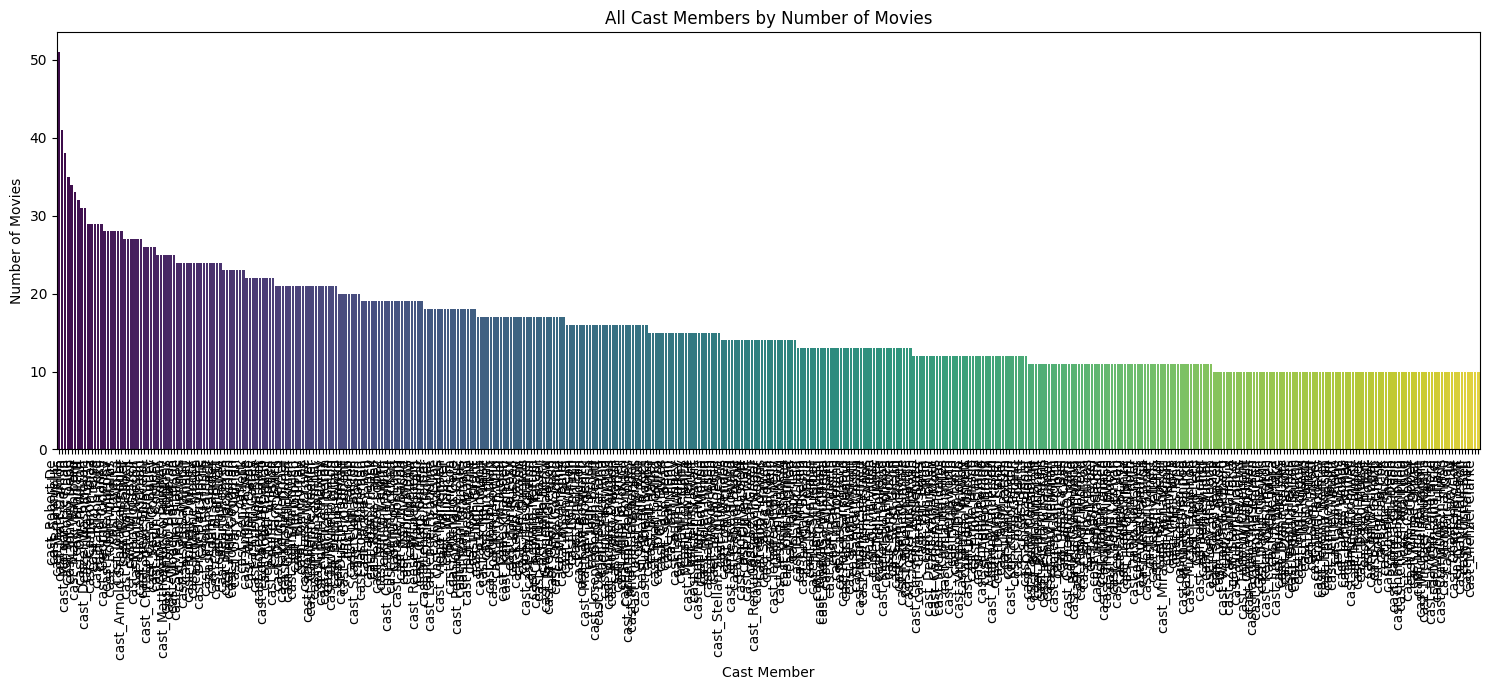

In [45]:
cast_columns = [col for col in df.columns if col.startswith('cast_')]

# Filter out any empty cast column if it exists (though less likely for cast)
cast_columns = [col for col in cast_columns if col != 'cast__']

if not cast_columns:
    print("No columns starting with 'cast_' found.")
else:
    cast_counts = df[cast_columns].sum().sort_values(ascending=False)

    all_cast = cast_counts

    plt.figure(figsize=(15, 7))
    sns.barplot(x=all_cast.index, y=all_cast.values, palette='viridis')
    plt.title('All Cast Members by Number of Movies')
    plt.xlabel('Cast Member')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

### **Number of Director**

In [46]:
unique_count = df['director'].explode().nunique()
print("Number of unique director:", unique_count)

Number of unique director: 2523


In [47]:
unique_director = df['director'].explode().unique()
print(unique_director)

['James Cameron' 'Gore Verbinski' 'Sam Mendes' ... 'Scott Smith'
 'Daniel Hsia' 'Brian Herzlinger']


In [48]:
director_counts = df['director'].explode().value_counts()
print(director_counts)

director
Steven Spielberg        27
Woody Allen             21
Clint Eastwood          20
Martin Scorsese         20
Anderson                18
                        ..
Jason Bateman            1
Scott Kalvert            1
Fran\u00e7ois Girard     1
Timothy Bjorklund        1
Brian Herzlinger         1
Name: count, Length: 2523, dtype: int64


In [49]:
low_count_director = director_counts[director_counts < 5].index.tolist()

df['director'] = df['director'].apply(
    lambda x: [director for director in x if director not in low_count_director] if isinstance(x, list) else []
)

print(f"director with counts less than 5 removed from 'director' column: {low_count_director}")

director with counts less than 5 removed from 'director' column: ['Bob Clark', 'Luke Greenfield', 'Jonathan Levine', 'Sergio Leone', 'James Gray', 'Michael Caton-Jones', 'Robert Wise', 'Vincenzo Natali', 'Richard Attenborough', 'Michael Hoffman', 'Bille Woodruff', 'Jonathan Frakes', 'David Lean', 'David Wain', 'Rob Bowman', 'Mikael H\\u00e5fstr\\u00f6m', 'Amy Heckerling', 'Alexandre Aja', 'Alejandro Amen\\u00e1bar', 'Richard Fleischer', 'Craig Gillespie', 'Andrew Fleming', 'David Frankel', 'Ronny Yu', 'John Sayles', 'Keenen Ivory', 'Hayao Miyazaki', 'George Tillman,', 'Jeff Tremaine', 'Hugh Wilson', 'Sean Anders', 'Jay Duplass', 'Walter Hill', 'Mark L.', 'Lester', 'Burr Steers', 'Peter Cattaneo', 'Frank Marshall', 'Christopher Guest', 'Peter Hewitt', 'Simon Wincer', 'Peter Howitt', 'James McTeigue', 'Dowdle', 'John Erick', 'Adrian Lyne', 'Mike Judge', 'Russell Mulcahy', 'Rick Famuyiwa', 'Terence Young', 'Penny Marshall', 'James Wong', 'Patrick Lussier', 'John Stockwell', 'Refn', 'Nicol

In [50]:
df['director'] = df['director'].apply(lambda x: [g.strip() for g in x] if isinstance(x, list) else [])

director_dummies = pd.get_dummies(df['director'].explode(), prefix='director').groupby(level=0).max().astype(int)

df = df.join(director_dummies)

df = df.drop(columns=['director'])

In [51]:
df.head()

,budget,homepage,popularity,release_date,revenue,runtime,vote_average,vote_count,genres_Action,genres_Adventure,...,director_Uwe Boll,director_Wayans,director_Wayne Wang,director_Wes Anderson,director_Wes Craven,director_William Friedkin,director_Wolfgang Petersen,director_Woody Allen,director_Zack Snyder,director_Zhang Yimou
0,237000000,1,150.437577,2009.0,2787965087,162.0,7.2,11800,1,1,...,0,0,0,0,0,0,0,0,0,0
1,300000000,1,139.082615,2007.0,961000000,169.0,6.9,4500,1,1,...,0,0,0,0,0,0,0,0,0,0
2,245000000,1,107.376788,2015.0,880674609,148.0,6.3,4466,1,1,...,0,0,0,0,0,0,0,0,0,0
3,250000000,1,112.312950,2012.0,1084939099,165.0,7.6,9106,1,0,...,0,0,0,0,0,0,0,0,0,0
4,260000000,1,43.926995,2012.0,284139100,132.0,6.1,2124,1,1,...,0,0,0,0,0,0,0,0,0,0


/var/folders/rw/nyg126716tq0wlsfjr46grsh0000gn/T/ipykernel_8160/3798875510.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_directors.index, y=all_directors.values, palette='viridis')


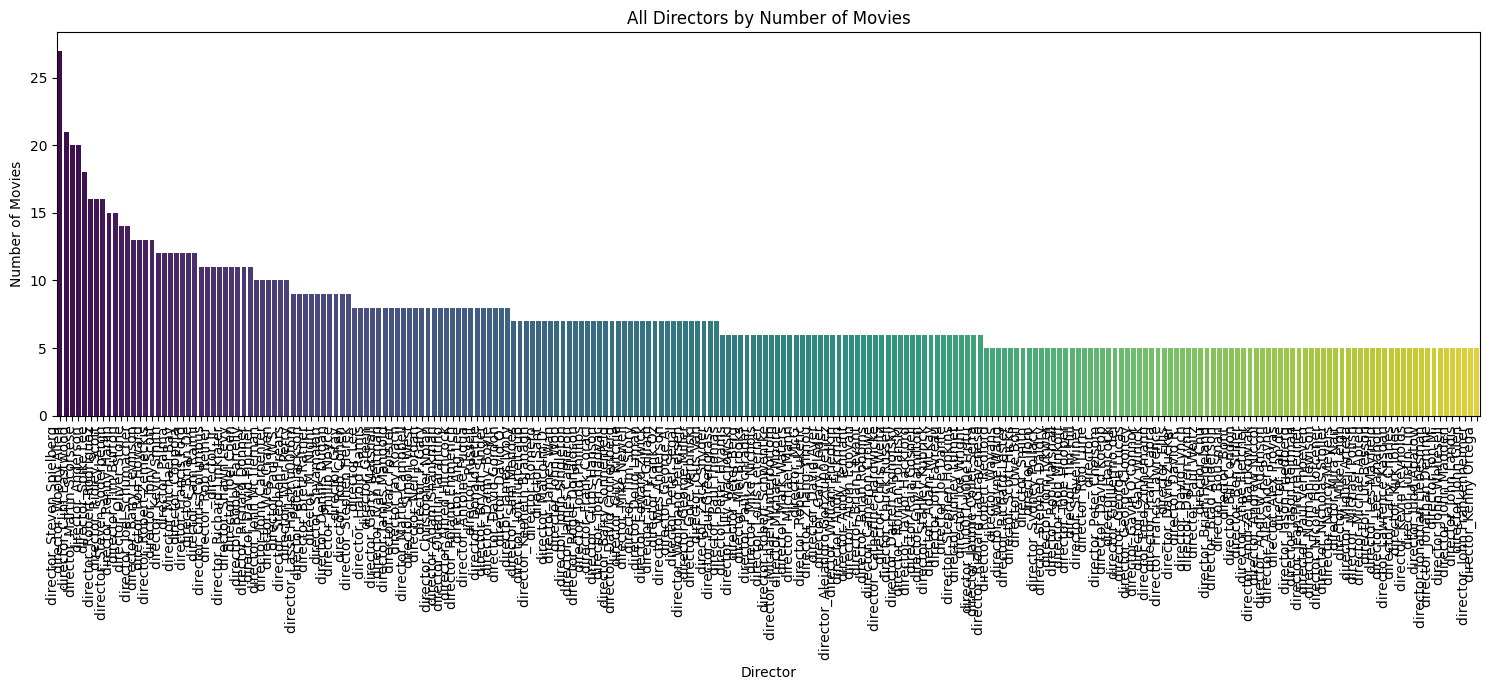

In [52]:
director_columns = [col for col in df.columns if col.startswith('director_')]

# Filter out any empty director column if it exists
director_columns = [col for col in director_columns if col != 'director__']

if not director_columns:
    print("No columns starting with 'director_' found.")
else:
    director_counts = df[director_columns].sum().sort_values(ascending=False)

    all_directors = director_counts

    plt.figure(figsize=(15, 7))
    sns.barplot(x=all_directors.index, y=all_directors.values, palette='viridis')
    plt.title('All Directors by Number of Movies')
    plt.xlabel('Director')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

### **Dropping the features with inbalance data and many columns after one-hot encoding**

In [53]:
# Identify columns to drop based on prefixes
prefix_columns_to_drop = []
for prefix in ['genre', 'lang_', 'company_', 'country_', 'cast_', 'director_']:
    prefix_columns_to_drop.extend([col for col in df.columns if col.startswith(prefix)])

# Combine with previously identified columns to drop
all_columns_to_drop = list(set(columns_to_drop + prefix_columns_to_drop))

df.drop(columns=all_columns_to_drop, inplace=True, errors='ignore')

### **Checking of null and duplicated values**

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4803 non-null   int64  
 1   homepage      4803 non-null   int64  
 2   popularity    4803 non-null   float64
 3   release_date  4802 non-null   float64
 4   revenue       4803 non-null   int64  
 5   runtime       4801 non-null   float64
 6   vote_average  4803 non-null   float64
 7   vote_count    4803 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 300.3 KB


In [55]:
df.isnull().sum()

budget          0
homepage        0
popularity      0
release_date    1
revenue         0
runtime         2
vote_average    0
vote_count      0
dtype: int64

In [56]:
df.dropna(inplace=True)

In [57]:
df.duplicated().sum()

np.int64(0)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4800 non-null   int64  
 1   homepage      4800 non-null   int64  
 2   popularity    4800 non-null   float64
 3   release_date  4800 non-null   float64
 4   revenue       4800 non-null   int64  
 5   runtime       4800 non-null   float64
 6   vote_average  4800 non-null   float64
 7   vote_count    4800 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 337.5 KB


## **Import the new Dataset**

In [59]:
df.to_csv('cleaned_data.csv', index=False)